In [16]:
import os
import caffe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# set the plotting parameters
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# we'll use the GoogLeNet model we fine-tuned
caffe_root = '/home/rips_tc/caffe/'
caffe.set_mode_cpu()
net = caffe.Net(caffe_root + 'models/google_logonet/deploy.prototxt',
                caffe_root + 'models/google_logonet/logonet.caffemodel',
                caffe.TEST)
net.blobs['data'].reshape(1, 3, 224, 224)

# set the transformer to conform to ImageNet standard
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'data/logos/logos_mean_deploy.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # imagenet operates on [0,255]
transformer.set_channel_swap('data', (2,1,0))

#we'll want the labels later, so load them from text:
logo_labels = caffe_root + 'data/logos/index-brand.txt'
labels = np.loadtxt(logo_labels, str, delimiter='\t')

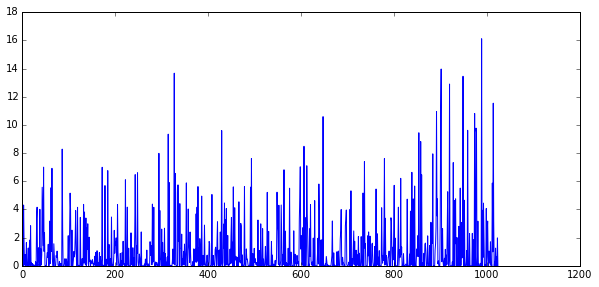

In [30]:
def top_results(image_src, num_results=3):
    net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(image_src))
    out = net.forward()
    feat = net.blobs['prob'].data[0]
    plt.plot(feat.flat)
    feat.flatten()

image_root = '/home/rips_tc/caffe/data/logos/images/'
nologo_root = '/home/rips_tc/Desktop/IMAGE_DATA_BACKUP/3500_BRANDS_FINAL_BACKUP/no-logo/'
top_results(nologo_root + 'image_5.jpeg')
feat = net.blobs['pool5/7x7_s1'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
#_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

In [23]:
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 3, 224, 224)),
 ('conv1/7x7_s2', (1, 64, 112, 112)),
 ('pool1/3x3_s2', (1, 64, 56, 56)),
 ('pool1/norm1', (1, 64, 56, 56)),
 ('conv2/3x3_reduce', (1, 64, 56, 56)),
 ('conv2/3x3', (1, 192, 56, 56)),
 ('conv2/norm2', (1, 192, 56, 56)),
 ('pool2/3x3_s2', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_0', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_1', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_2', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_3', (1, 192, 28, 28)),
 ('inception_3a/1x1', (1, 64, 28, 28)),
 ('inception_3a/3x3_reduce', (1, 96, 28, 28)),
 ('inception_3a/3x3', (1, 128, 28, 28)),
 ('inception_3a/5x5_reduce', (1, 16, 28, 28)),
 ('inception_3a/5x5', (1, 32, 28, 28)),
 ('inception_3a/pool', (1, 192, 28, 28)),
 ('inception_3a/pool_proj', (1, 32, 28, 28)),
 ('inception_3a/output', (1, 256, 28, 28)),
 ('inception_3a/output_inception_3a/output_0_split_0', (1, 256, 28, 28)),
 ('inception_3a/output_inception_3a/output_0_split_1',

In [22]:
def top_results(image_src, num_results=3):
    net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(image_src))
    out = net.forward()
    feat = net.blobs['prob'].data[0]
    #plt.plot(feat.flat)
    return feat.flatten()

nologo_root = '/home/rips_tc/Desktop/IMAGE_DATA_BACKUP/3500_BRANDS_FINAL_BACKUP/no-logo/'
max = 0
for i, image in enumerate(os.listdir(nologo_root)):
    test = top_results(nologo_root + 'image_' + str(i + 1) + '.jpeg').max()
    if test >= max:
        max = test
print max

KeyboardInterrupt: 

In [ ]:
num_results = 5
labels[temp.flatten().argsort()[-1:-(num_results+1):-1]]
temp.flatten().max()